# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Outputs/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

ModuleNotFoundError: No module named 'citipy'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
       
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count
len(cities)

625

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [9]:
#Define base url for API call
base_url = "http://api.openweathermap.org/data/2.5/weather?"

#Identify lists for dataframe
names = []
identification = []
lats = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

#Create for loop to run through each city
for city in cities:
    query_url = base_url + "appid=" + '4d47584a1ece4d2995b4c1bd41f593cf' + "&q=" + city
    response = requests.get(query_url)
    weather_json = response.json()
    
    #Append each list for dataframe, making sure to have an out for errors
    try:
        if weather_json["sys"]["id"] > 0:
            loc = weather_json["name"]
            names.append(loc)
        ids = weather_json["sys"]["id"]
        identification.append(ids)
        lat = weather_json["coord"]["lat"]
        lats.append(lat)
        temp = weather_json["main"]["temp_max"]
        temperature.append(temp)
        humid = weather_json["main"]["humidity"]
        humidity.append(humid)
        cloud = weather_json["clouds"]["all"]
        cloudiness.append(cloud)
        wind = weather_json["wind"]["speed"]
        wind_speed.append(wind)
        
        print(f"Processing Data for {ids}: {loc}")
        
    except KeyError:
        print("No data available - moving to next city.")
    
    

No data available - moving to next city.
No data available - moving to next city.
Processing Data for 6434: Muros
No data available - moving to next city.
Processing Data for 942: Tuktoyaktuk
No data available - moving to next city.
No data available - moving to next city.
Processing Data for 8303: Ushuaia
Processing Data for 8521: Puerto Ayora
Processing Data for 2008959: Mataura
No data available - moving to next city.
Processing Data for 951: Norman Wells
No data available - moving to next city.
No data available - moving to next city.
Processing Data for 8512: Castro
Processing Data for 8691: Pisco
No data available - moving to next city.
Processing Data for 165: Ilulissat
Processing Data for 9545: Hobart
No data available - moving to next city.
No data available - moving to next city.
Processing Data for 1563: Clonakilty
Processing Data for 1899: Cape Town
No data available - moving to next city.
Processing Data for 9550: Mildura
No data available - moving to next city.
Processing

No data available - moving to next city.
Processing Data for 6894: Canico
No data available - moving to next city.
Processing Data for 9138: Kachhwa
Processing Data for 9372: Victoria
Processing Data for 1928: Ritchie
No data available - moving to next city.
No data available - moving to next city.
No data available - moving to next city.
Processing Data for 9201: Banepa
No data available - moving to next city.
No data available - moving to next city.
Processing Data for 3217: Fortuna
No data available - moving to next city.
No data available - moving to next city.
Processing Data for 2260: Luderitz
No data available - moving to next city.
Processing Data for 1679: Stokke
Processing Data for 797: Iqaluit
No data available - moving to next city.
No data available - moving to next city.
Processing Data for 8638: Villamontes
Processing Data for 2001020: Aviles
Processing Data for 4247: Gainesville
No data available - moving to next city.
Processing Data for 9322: Thanatpin
No data availab

No data available - moving to next city.
Processing Data for 8408: Rio Grande
No data available - moving to next city.
Processing Data for 7113: Constitucion
No data available - moving to next city.
No data available - moving to next city.
Processing Data for 9371: Kinarut
Processing Data for 4787: Leon
No data available - moving to next city.
No data available - moving to next city.
No data available - moving to next city.
No data available - moving to next city.
Processing Data for 9010: Nukus
Processing Data for 9594: Flinders
No data available - moving to next city.
Processing Data for 6627: Milkovo
No data available - moving to next city.
Processing Data for 7950: Keelung
Processing Data for 9569: Northam
No data available - moving to next city.
No data available - moving to next city.
No data available - moving to next city.
No data available - moving to next city.
No data available - moving to next city.
No data available - moving to next city.
Processing Data for 9012: Nuristan

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [17]:
data = {"City": names, "City ID": identification, "Location": lats, "Temperature": temperature, "Humidity": humidity, "Cloudiness": cloudiness, "Wind Speed": wind_speed}
data_df = pd.DataFrame(data)
data_df

data_df.to_csv(output_data_file, index = False)

data_df.head(10)


,City,City ID,Location,Temperature,Humidity,Cloudiness,Wind Speed
0,Muros,6434,42.77,299.82,65,20,2.60
1,Tuktoyaktuk,942,69.44,283.15,87,75,6.70
2,Ushuaia,8303,-54.81,275.15,69,75,8.70
3,Puerto Ayora,8521,-0.74,297.15,69,75,7.70
4,Mataura,2008959,-46.19,275.93,98,4,2.08
5,Norman Wells,951,65.28,293.15,68,20,3.10
6,Castro,8512,-42.48,280.15,93,75,1.50
7,Pisco,8691,-13.71,295.15,30,90,5.10
8,Ilulissat,165,69.22,286.15,47,75,1.50
9,Hobart,9545,-42.88,278.71,92,20,3.10


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

AttributeError: 'function' object has no attribute 'savefig'

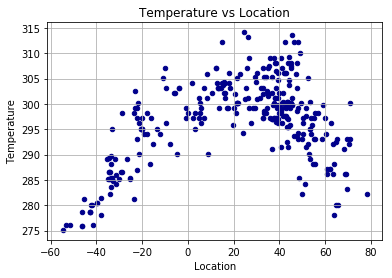

In [27]:
latvtemp = data_df.plot.scatter(x = 'Location', y = 'Temperature', c='DarkBlue', title ="Temperature vs Location", grid = True)

plt.get.savefig("Output/latvtemp.png")


#### Latitude vs. Humidity Plot

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

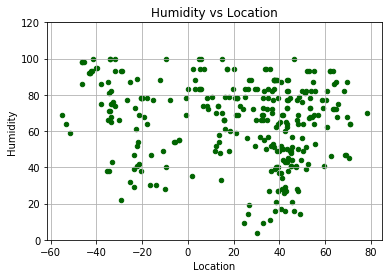

In [29]:
latvhum = data_df.plot.scatter(x = 'Location', y = 'Humidity', c='DarkGreen', title ="Humidity vs Location", grid = True, ylim = [0,120])

latvtemp.savefig("Output/latvhum.png")

#### Latitude vs. Cloudiness Plot

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

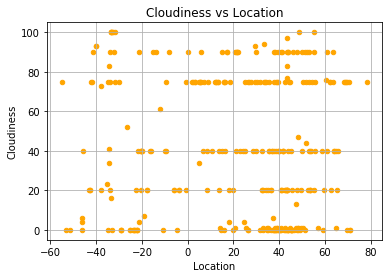

In [32]:
latvcloud = data_df.plot.scatter(x = 'Location', y = 'Cloudiness', c='Orange', title ="Cloudiness vs Location", grid = True)

latvtemp.savefig("Output/latvcloud.png")

#### Latitude vs. Wind Speed Plot

AttributeError: 'AxesSubplot' object has no attribute 'savefig'

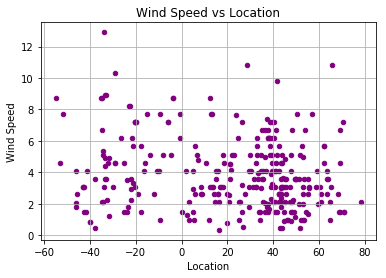

In [33]:
latvwind = data_df.plot.scatter(x = 'Location', y = 'Wind Speed', c='Purple', title ="Wind Speed vs Location", grid = True)

latvtemp.savefig("Output/latvwind.png")